In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
x = df["YearsExperience"]
y = df["Salary"]

In [4]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
x_train = x_train.to_frame()
y_train = y_train.to_frame()
x_test = x_test.to_frame()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

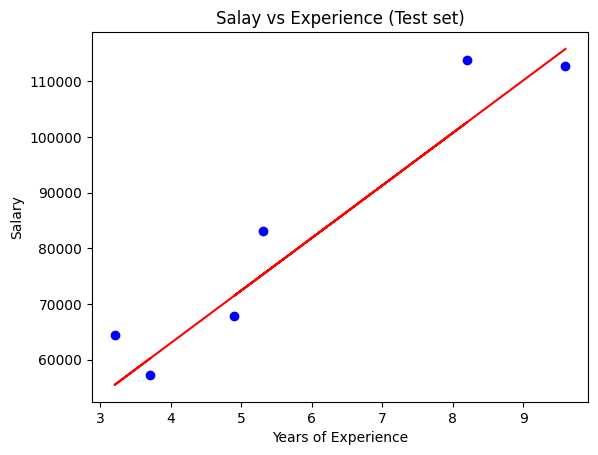

In [8]:
#

plt.scatter(x_test, y_test, color = "Blue")
plt.plot(x_test, y_pred, color = "Red")
plt.xlabel("Years of Experience")
plt.title("Salay vs Experience (Test set)")
plt.ylabel("Salary")
plt.show( )

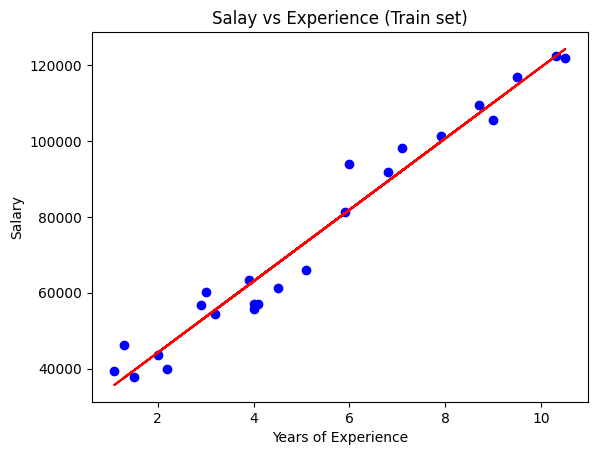

In [9]:
plt.scatter(x_train, y_train, color = "Blue")
plt.plot(x_train, model.predict(x_train), color = "Red")
plt.xlabel("Years of Experience")
plt.title("Salay vs Experience (Train set)")
plt.ylabel("Salary")
plt.show( )

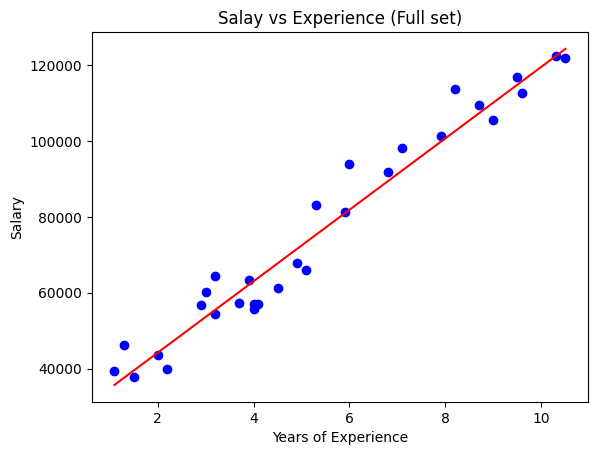

In [10]:
x = x.to_frame()
plt.scatter(x,y, color = "Blue")
plt.plot(x, model.predict(x), color = "Red")
plt.xlabel("Years of Experience")
plt.title("Salay vs Experience (Full set)")
plt.ylabel("Salary")
plt.show( )

In [11]:
y_pred = pd.Series(y_pred.flatten())


In [12]:
y_test= y_test.reset_index(drop = True)
comparison = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})

In [13]:
comparison

,Actual,Predicted
0,112635,115790.210113
1,67938,71498.278095
2,113812,102596.868661
3,83088,75267.804224
4,64445,55477.792045
5,57189,60189.699707


In [14]:
coef = model.coef_
intercept = model.intercept_

In [15]:
exp_12_yrs = (coef *12 + intercept)[0,0]
print(f"Salary of man with 12 years of experience = {exp_12_yrs}")

Salary of man with 12 years of experience = 138407.36688814854


In [16]:
#trianing score 
bias = model.score(x_train, y_train)
bias

0.9645401573418146

In [17]:
variance = model.score(x_test, y_test)
variance

0.9024461774180497

In [18]:
#Statistical Analysis

In [19]:
average = df.mean()
average_salary = df.Salary.mean()

In [20]:
median = df.median()

In [21]:
mode = df.mode().iloc[0]
mode

YearsExperience        3.2
Salary             37731.0
Name: 0, dtype: float64

In [22]:
var = df.var()
var 

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [23]:
std = df.std()
std

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [24]:
import scipy.stats as stats
from scipy.stats import variation

var = variation(df.values)
var

array([0.5251297 , 0.35463929])

In [25]:
corr = df.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [26]:
cor_salary = df.Salary.corr(df.YearsExperience)
cor_salary

np.float64(0.9782416184887598)

In [27]:
standard_error = df.sem()
standard_error

YearsExperience       0.518125
Salary             5005.167198
dtype: float64

In [28]:
#z_score 

z_score = df.apply(stats.zscore)
z_score.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [29]:
#Degree of freedom 

a = df.shape[0]
b = df.shape[1]

degree_of_freedom = a - b
print(degree_of_freedom)

28


In [30]:
#SSR

y_mean = np.mean(y)
SSR = np.sum((y_pred - y_mean)**2)
print(f"SSR: {SSR}")

SSR: 2982433598.9122176


In [31]:
#SSE


y = y[0:6]
SSE = np.sum((y - y_pred) **2)
print(f"SSE : {SSE}")

SSE : 11954646647.385353


In [32]:
#SST 

mean_total = np.mean(df.values)
SST = np.sum((df.values - mean_total) ** 2 )
print(f"SST : {SST}")

SST : 108429703765.82735


In [33]:
#Quality  of Model 
r_square = 1 - (SSR/SST)
print(f"r_square : {r_square}")

r_square : 0.9724943120258513
